In [64]:
import requests
from bs4 import BeautifulSoup
import re
from nltk.tokenize import RegexpTokenizer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.corpus import wordnet as wn
import pandas as pd

# Web Crawler & Classifier
- Convert this tutorial for our usecase [https://github.com/datacamp/datacamp_facebook_live_nlp/blob/master/NLP_FB_live_coding_soln.ipynb](https://github.com/datacamp/datacamp_facebook_live_nlp/blob/master/NLP_FB_live_coding_soln.ipynb)
- Maybe implement RAKE [https://github.com/csurfer/rake-nltk](https://github.com/csurfer/rake-nltk)

### URL of site to scrape

In [18]:
url = "http://"+ "inhabitat.com" + "/the-worlds-first-space-nation-officially-in-orbit-with-new-satellite/"

In [19]:
r = requests.get(url)
type(r)

requests.models.Response

### Cleaning function to remove HTML Junk

In [ ]:
def clean_me(html):
    soup = BeautifulSoup(html)
    for s in soup(['script', 'style']):
        s.decompose()
    return ' '.join(soup.stripped_strings)

### Remove HTML from text

In [30]:
html = r.text
html = clean_me(html) 
print(html)

The world's first space nation is now officially in orbit | Inhabitat - Green Design, Innovation, Architecture, Green Building LOGIN Lost your password? Connect with: Facebook Google Twitter Logging In SIGN UP Create an Inhabitat account Sign up for weekly newsletter I agree to receive emails from the site. I can withdraw my consent at any time by unsubscribing. Do you live in Canada? Register here. Connect with: Facebook Google Twitter Signing Up LOST PASSWORD Checking for Account flipboard Log In Sign Up opener News Environment Architecture Design Innovation More Fashion Kids About Mission Submit a story Advertise with us Contact Press Legal Privacy Policy Cookie Policy Log In Sign Up The world’s first space nation is now officially in orbit 11/16/2017 under NASA , News , Science by Greg Beach 0 Add to Flipboard Magazine. by Greg Beach View Slideshow Space is now officially home to the known universe’s first “space nation”. Asgardia launched its very first satellite, Asgardia-1, into

/usr/local/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /usr/local/Cellar/python/2.7.14/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [31]:
soup = BeautifulSoup(html, "html5lib")
type(soup)

bs4.BeautifulSoup

In [41]:
text = soup.get_text()
print(text)

The world's first space nation is now officially in orbit | Inhabitat - Green Design, Innovation, Architecture, Green Building LOGIN Lost your password? Connect with: Facebook Google Twitter Logging In SIGN UP Create an Inhabitat account Sign up for weekly newsletter I agree to receive emails from the site. I can withdraw my consent at any time by unsubscribing. Do you live in Canada? Register here. Connect with: Facebook Google Twitter Signing Up LOST PASSWORD Checking for Account flipboard Log In Sign Up opener News Environment Architecture Design Innovation More Fashion Kids About Mission Submit a story Advertise with us Contact Press Legal Privacy Policy Cookie Policy Log In Sign Up The world’s first space nation is now officially in orbit 11/16/2017 under NASA , News , Science by Greg Beach 0 Add to Flipboard Magazine. by Greg Beach View Slideshow Space is now officially home to the known universe’s first “space nation”. Asgardia launched its very first satellite, Asgardia-1, into

# Tokenize words in text
Step 1: Tokenize
You want to tokenize your text, that is, split it into a list a words.

In [54]:
tokens = re.findall('\w+', text)
print len(tokens)
print(tokens[:25])

670
[u'The', u'world', u's', u'first', u'space', u'nation', u'is', u'now', u'officially', u'in', u'orbit', u'Inhabitat', u'Green', u'Design', u'Innovation', u'Architecture', u'Green', u'Building', u'LOGIN', u'Lost', u'your', u'password', u'Connect', u'with', u'Facebook']


# Create tokenizer
# Create tokens

In [43]:
# Create tokenizer
tokenizer = RegexpTokenizer('\w+')
# Create tokens
tokens = tokenizer.tokenize(text)
tokens[:8]

[u'The', u'world', u's', u'first', u'space', u'nation', u'is', u'now']

# Initialize new list

In [45]:
# Initialize new list
words = []


# Loop through list tokens and make lower case
for word in tokens:
    words.append(word.lower())


# Print several items from list as sanity check
print(words[:8])
print(len(words))

[u'the', u'world', u's', u'first', u'space', u'nation', u'is', u'now']
670


# Get English stopwords

In [48]:
# Get English stopwords and print some of them
sw = nltk.corpus.stopwords.words('english')
sw[:5]
print(len(sw))

153


# Create a new list of words after removing stop words

In [76]:
# Initialize new list
words_ns = []

# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw and word.isalpha():
        words_ns.append(word.encode('utf-8'))

# Print several list items as sanity check
print(words_ns[:60])
print(len(words_ns))

['world', 'first', 'space', 'nation', 'officially', 'orbit', 'inhabitat', 'green', 'design', 'innovation', 'architecture', 'green', 'building', 'login', 'lost', 'password', 'connect', 'facebook', 'google', 'twitter', 'logging', 'sign', 'create', 'inhabitat', 'account', 'sign', 'weekly', 'newsletter', 'agree', 'receive', 'emails', 'site', 'withdraw', 'consent', 'time', 'unsubscribing', 'live', 'canada', 'register', 'connect', 'facebook', 'google', 'twitter', 'signing', 'lost', 'password', 'checking', 'account', 'flipboard', 'log', 'sign', 'opener', 'news', 'environment', 'architecture', 'design', 'innovation', 'fashion', 'kids', 'mission']
392


In [77]:
tagged_text = nltk.pos_tag(words_ns)
tagged_text

[('world', 'NN'),
 ('first', 'RB'),
 ('space', 'NN'),
 ('nation', 'NN'),
 ('officially', 'RB'),
 ('orbit', 'RB'),
 ('inhabitat', 'JJ'),
 ('green', 'JJ'),
 ('design', 'NN'),
 ('innovation', 'NN'),
 ('architecture', 'NN'),
 ('green', 'JJ'),
 ('building', 'VBG'),
 ('login', 'NN'),
 ('lost', 'VBD'),
 ('password', 'NN'),
 ('connect', 'NN'),
 ('facebook', 'NN'),
 ('google', 'NN'),
 ('twitter', 'NN'),
 ('logging', 'VBG'),
 ('sign', 'NN'),
 ('create', 'NN'),
 ('inhabitat', 'JJ'),
 ('account', 'NN'),
 ('sign', 'JJ'),
 ('weekly', 'JJ'),
 ('newsletter', 'NN'),
 ('agree', 'VBP'),
 ('receive', 'NN'),
 ('emails', 'NNS'),
 ('site', 'NN'),
 ('withdraw', 'JJ'),
 ('consent', 'NN'),
 ('time', 'NN'),
 ('unsubscribing', 'VBG'),
 ('live', 'JJ'),
 ('canada', 'NN'),
 ('register', 'NN'),
 ('connect', 'VBP'),
 ('facebook', 'NN'),
 ('google', 'NN'),
 ('twitter', 'NN'),
 ('signing', 'VBG'),
 ('lost', 'VBN'),
 ('password', 'NN'),
 ('checking', 'VBG'),
 ('account', 'NN'),
 ('flipboard', 'RB'),
 ('log', 'VBZ'),
 ('s

In [78]:
new_words_ns = {}
for wn in words_ns:
    if wn not in new_words_ns.keys():
        new_words_ns[str(wn)] = 1
    else:
        new_words_ns[str(wn)] = int(new_words_ns[str(wn)]) + 1

df = pd.DataFrame(new_words_ns.items(), columns=['Word', 'Count'])\
       .sort(['Count'], ascending=[False])\
       .reset_index(drop=True)
print df

              Word  Count
0         asgardia      8
1            space      8
2           nation      7
3            first      5
4            orbit      5
5             sign      4
6       officially      4
7              cnn      3
8             live      3
9            world      3
10             pin      3
11          normal      3
12           tweet      3
13          design      3
14           green      3
15       slideshow      3
16           share      3
17            nasa      3
18            said      2
19        facebook      2
20          living      2
21            news      2
22         twitter      2
23        password      2
24           beach      2
25         account      2
26         connect      2
27            lost      2
28            able      2
29        isolated      2
..             ...    ...
256       november      1
257  nationalities      1
258         canada      1
259          cargo      1
260      caribbean      1
261   constitution      1
262         

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


# Create freq dist and plot

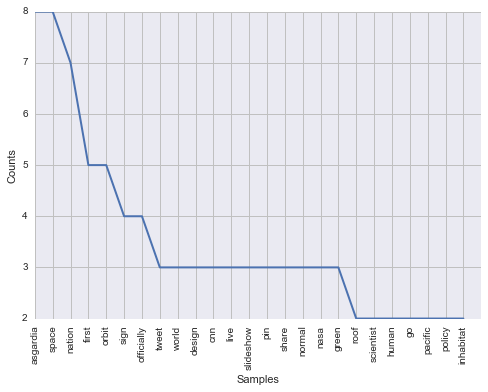

In [79]:
# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(words_ns)
freqdist1.plot(25)